In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data=pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data=np.array(data)
m,n=data.shape
np.random.shuffle(data)

data_dev=data[0:1000].T
Y_dev=data_dev[0]
X_dev=data_dev[1:n]
X_dev=X_dev/255

data_train=data[1000:m].T
Y_train=data_train[0]
X_train=data_train[1:n]
X_train=X_train/255
_,m_train = X_train.shape

In [5]:
Y_train

array([2, 1, 7, ..., 7, 7, 3])

In [6]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [7]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [8]:
W1,b1,W2,b2= gradient_descent(X_train,Y_train,0.12,500)

Iteration:  0
[3 2 4 ... 8 1 2] [2 1 7 ... 7 7 3]
0.0641219512195122
Iteration:  10
[0 2 4 ... 8 4 5] [2 1 7 ... 7 7 3]
0.17936585365853658
Iteration:  20
[3 2 7 ... 8 0 3] [2 1 7 ... 7 7 3]
0.2870731707317073
Iteration:  30
[3 1 7 ... 0 7 3] [2 1 7 ... 7 7 3]
0.40865853658536583
Iteration:  40
[8 1 7 ... 0 7 3] [2 1 7 ... 7 7 3]
0.47368292682926827
Iteration:  50
[8 1 7 ... 7 7 3] [2 1 7 ... 7 7 3]
0.5185365853658537
Iteration:  60
[8 1 7 ... 7 7 3] [2 1 7 ... 7 7 3]
0.555829268292683
Iteration:  70
[8 1 7 ... 7 7 3] [2 1 7 ... 7 7 3]
0.5886097560975609
Iteration:  80
[8 1 7 ... 7 7 3] [2 1 7 ... 7 7 3]
0.619219512195122
Iteration:  90
[8 1 7 ... 7 7 3] [2 1 7 ... 7 7 3]
0.6450487804878049
Iteration:  100
[8 1 7 ... 7 7 3] [2 1 7 ... 7 7 3]
0.6655853658536586
Iteration:  110
[8 1 7 ... 7 7 3] [2 1 7 ... 7 7 3]
0.685219512195122
Iteration:  120
[8 1 7 ... 7 7 3] [2 1 7 ... 7 7 3]
0.7023658536585365
Iteration:  130
[8 1 7 ... 7 7 3] [2 1 7 ... 7 7 3]
0.7162439024390244
Iteration:  140
[

In [9]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [3]
Label:  3


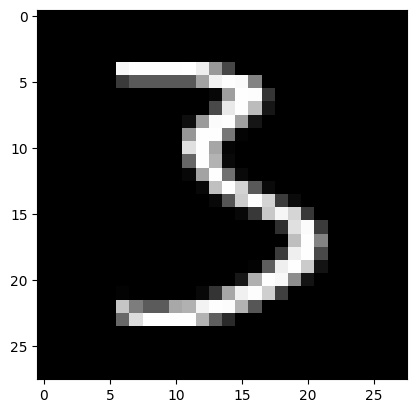

Prediction:  [1]
Label:  1


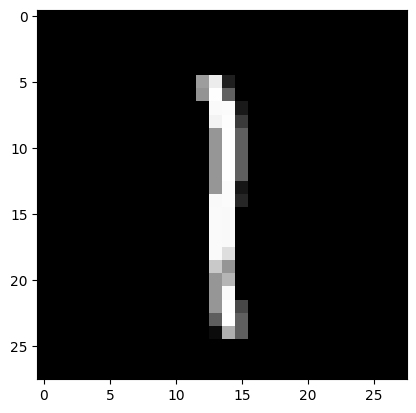

Prediction:  [2]
Label:  2


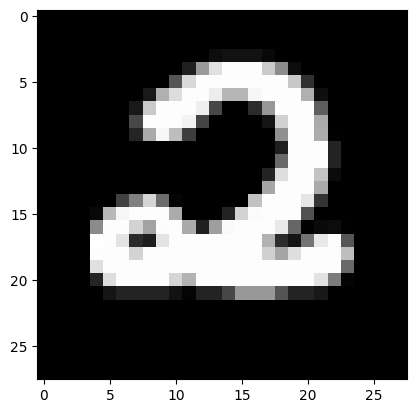

Prediction:  [7]
Label:  2


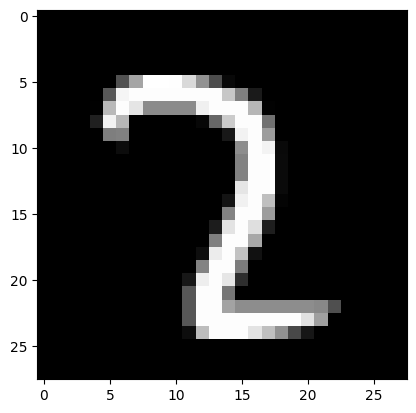

In [10]:
test_prediction(10, W1, b1, W2, b2)
test_prediction(7, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)
test_prediction(0, W1, b1, W2, b2)

In [11]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[2 4 1 4 9 7 0 3 6 1 8 9 4 1 2 8 0 1 9 3 4 6 3 7 1 9 0 0 5 2 3 1 1 4 5 4 5
 2 6 5 1 7 2 1 9 1 0 2 4 4 1 6 3 2 2 6 7 3 0 5 9 1 9 2 1 7 9 5 6 4 1 2 7 2
 6 6 7 8 4 5 1 7 1 5 8 4 7 0 0 7 8 0 8 1 0 3 3 5 3 7 1 1 6 3 0 9 1 2 6 9 3
 2 8 9 0 8 7 1 9 1 0 9 5 7 3 8 3 8 5 9 3 4 8 6 1 4 1 0 4 5 8 1 1 0 7 6 2 2
 5 8 4 4 8 7 5 7 7 4 9 0 7 3 1 1 9 7 6 9 7 9 4 0 8 8 0 6 4 4 7 4 6 1 1 3 6
 7 0 9 8 7 6 3 2 7 3 1 3 1 3 1 3 1 7 4 0 2 3 8 3 2 8 1 4 9 1 5 1 1 5 1 6 6
 5 9 4 5 2 4 6 0 3 8 9 3 7 7 2 8 7 1 1 6 1 3 6 9 4 7 1 4 2 2 6 8 0 1 4 3 3
 2 9 0 2 8 1 2 9 8 4 6 0 6 2 5 9 7 8 1 4 9 3 2 8 8 5 2 0 8 8 7 3 8 2 6 3 1
 0 1 5 9 7 3 7 3 4 3 5 3 1 7 4 1 4 1 0 7 0 4 0 2 4 9 1 7 6 9 3 0 4 0 8 1 9
 8 7 1 1 8 7 2 9 6 1 1 5 9 8 1 2 8 0 8 6 8 9 9 7 9 2 3 2 3 4 0 9 0 7 8 0 2
 7 4 6 0 1 0 5 1 0 6 7 2 8 4 3 6 8 7 2 6 9 3 5 6 8 9 1 0 1 1 9 9 5 4 0 0 8
 0 7 4 4 3 6 9 6 9 4 7 4 8 0 2 1 4 4 1 3 9 1 5 9 4 6 8 7 3 8 3 4 9 0 8 4 3
 9 1 9 0 1 4 8 2 3 3 9 4 5 1 2 6 4 3 7 4 9 3 3 7 8 1 1 2 0 9 9 2 2 3 4 2 2
 1 2 7 0 1 1 4 0 5 2 2 0 

0.851